Score Announcement

# Preprocessing

In [1]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords

### 1. Read in csv file and create Dataframe & check shape.

In [2]:
train_df = pd.read_csv("amazon_train_df.csv")
test_df = pd.read_csv("amazon_test_df.csv")
print(train_df.shape, test_df.shape)

tmp_tr = train_df
tmp_te = test_df

(500, 5) (25, 5)


In [3]:
train_df.head()

,0,1,2,3,4
0,One Star,1.0,25 July 2014,By\n \n Andrea Bradden\n \n on 25 July...,"ordered this, there was no PB embroidered on ..."
1,Arm missing!!,1.0,1 Nov. 2015,By\n \n gemma james\n \n on 1 Nov. 2015,These are smaller than than you think and a l...
2,Cheap advent calendar,1.0,28 Oct. 2015,By\n \n lully\n \n on 28 Oct. 2015,Thought this would make a lovely different ca...
3,Poor quality sand,1.0,26 Dec. 2015,By\n \n Amazon Customer\n \n on 26 Dec...,The sand is rubbish - very messy and doesn't ...
4,Colour choice,1.0,19 Dec. 2015,By\n \n Pen Name\n \n on 19 Dec. 2015,Know it says random colours but wish we could...


In [4]:
train_df.iloc[4,4]

" Know it says random colours but wish we could choose. Red is quite dark and my girlie girl won't like it and will surely wonder why Santa has given her a colour she doesn't like! "

### 2. Cleaning( Remove HTML )

In [5]:
## Add new columns to 'review_df' or change the column name
train_df.columns = ['review_title','rating','review_date','customer_name', 'review']
test_df.columns = ['review_title','rating','review_date','customer_name', 'review']

In [6]:
train_df

,review_title,rating,review_date,customer_name,review
0,One Star,1.0,25 July 2014,By\n \n Andrea Bradden\n \n on 25 July...,"ordered this, there was no PB embroidered on ..."
1,Arm missing!!,1.0,1 Nov. 2015,By\n \n gemma james\n \n on 1 Nov. 2015,These are smaller than than you think and a l...
2,Cheap advent calendar,1.0,28 Oct. 2015,By\n \n lully\n \n on 28 Oct. 2015,Thought this would make a lovely different ca...
3,Poor quality sand,1.0,26 Dec. 2015,By\n \n Amazon Customer\n \n on 26 Dec...,The sand is rubbish - very messy and doesn't ...
4,Colour choice,1.0,19 Dec. 2015,By\n \n Pen Name\n \n on 19 Dec. 2015,Know it says random colours but wish we could...
...,...,...,...,...,...
495,Five Stars,5.0,29 Sept. 2014,By\n \n D. G. Long\n \n on 29 Sept. 2014,My daughter loves this and runs and jumps abo...
496,Five Stars,5.0,5 Jan. 2016,By\n \n Paul Cavanagh\n \n on 5 Jan. 2...,Great model
497,Fantastic detail! A beautiful model traction e...,5.0,23 Nov. 2015,By\n \n JET\n \n on 23 Nov. 2015,Fantastic detail! A beautiful model traction ...
498,very good quality,5.0,7 July 2013,By\n \n Storm\n \n on 7 July 2013,"easy to couple with other models, great to ex..."


In [7]:
def remove_html(text):
    soup = BeautifulSoup(text, 'lxml')
    return soup.get_text()

train_df['review'].apply(lambda x: remove_html(x))
test_df['review'].apply(lambda x: remove_html(x))
train_df.head()

/var/folders/dy/7xnphd255c182883n0twgwgm0000gn/T/ipykernel_93128/3637730044.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


,review_title,rating,review_date,customer_name,review
0,One Star,1.0,25 July 2014,By\n \n Andrea Bradden\n \n on 25 July...,"ordered this, there was no PB embroidered on ..."
1,Arm missing!!,1.0,1 Nov. 2015,By\n \n gemma james\n \n on 1 Nov. 2015,These are smaller than than you think and a l...
2,Cheap advent calendar,1.0,28 Oct. 2015,By\n \n lully\n \n on 28 Oct. 2015,Thought this would make a lovely different ca...
3,Poor quality sand,1.0,26 Dec. 2015,By\n \n Amazon Customer\n \n on 26 Dec...,The sand is rubbish - very messy and doesn't ...
4,Colour choice,1.0,19 Dec. 2015,By\n \n Pen Name\n \n on 19 Dec. 2015,Know it says random colours but wish we could...


### 3. Remove punctuation(구두점) & lower case

In [8]:
print('Punctuation: ', string.punctuation)

Punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
def remove_punctuation(text):
    sent = []
    for t in text.split(' '):
        no_punct = "".join([c for c in t if c not in string.punctuation])
        sent.append(no_punct)

    sentence = " ".join(s for s in sent)
    sentence = sentence.lower()
    return sentence

In [10]:
## apply remove_punctuation function
train_df['review'] = train_df['review'].apply(lambda x: remove_punctuation(x))
train_df['review_title'] = train_df['review_title'].apply(lambda x: remove_punctuation(x))

test_df['review'] = test_df['review'].apply(lambda x: remove_punctuation(x))
test_df['review_title'] = test_df['review_title'].apply(lambda x: remove_punctuation(x))
train_df.head()

,review_title,rating,review_date,customer_name,review
0,one star,1.0,25 July 2014,By\n \n Andrea Bradden\n \n on 25 July...,ordered this there was no pb embroidered on t...
1,arm missing,1.0,1 Nov. 2015,By\n \n gemma james\n \n on 1 Nov. 2015,these are smaller than than you think and a l...
2,cheap advent calendar,1.0,28 Oct. 2015,By\n \n lully\n \n on 28 Oct. 2015,thought this would make a lovely different ca...
3,poor quality sand,1.0,26 Dec. 2015,By\n \n Amazon Customer\n \n on 26 Dec...,the sand is rubbish very messy and doesnt st...
4,colour choice,1.0,19 Dec. 2015,By\n \n Pen Name\n \n on 19 Dec. 2015,know it says random colours but wish we could...


### 4. Lemmatization or Stemming

In [11]:
## using spacy
# !python -m spacy download en
import spacy

nlp = spacy.load('en_core_web_sm')

/opt/homebrew/anaconda3/lib/python3.12/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [12]:
# Copy original DataFrames for Stemming
train_df_stem = train_df.copy()
test_df_stem = test_df.copy()

In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

def tokenize_and_stem(text):
    tokens = word_tokenize(text) # tokenize
    return [stemmer.stem(token) for token in tokens]

# stemming
train_df_stem['review'] = train_df_stem['review'].apply(tokenize_and_stem)
train_df_stem['review_title'] = train_df_stem['review_title'].apply(tokenize_and_stem)

test_df_stem['review'] = test_df_stem['review'].apply(tokenize_and_stem)
test_df_stem['review_title'] = test_df_stem['review_title'].apply(tokenize_and_stem)
test_df_stem.head()

[nltk_data] Downloading package punkt to /Users/chu-ingyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/chu-
[nltk_data]     ingyu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review_title,rating,review_date,customer_name,review
0,"[and, my, grandson, wa, huge, disappoint]",1.0,24 May 2015,By\n \n Josephine Chetter\n \n on 24 M...,"[my, daughter, had, bought, the, appropri, vte..."
1,"[incorrect, answer, to, some, of, the, question]",1.0,20 Aug. 2014,By\n \n Alison\n \n on 20 Aug. 2014,"[a, good, game, if, all, the, answer, were, co..."
2,"[dont, wast, your, money]",1.0,6 Feb. 2012,By\n \n L. Turnbull\n \n on 6 Feb. 2012,"[ok, thi, didnt, cost, a, lot, but, neverthele..."
3,"[broken, present]",1.0,24 Feb. 2015,By\n \n karen yates\n \n on 24 Feb. 2015,"[i, bought, 2, of, these, for, my, grandson, f..."
4,[unimpress],1.0,11 April 2012,By\n \n b4time\n \n on 11 April 2012,"[the, d20, is, not, a, regular, shapeth, 11, i..."


In [14]:
# Copy original DataFrames for Lemmatizing
train_df_lemma = train_df.copy()
test_df_lemma = test_df.copy()

In [15]:
def word_lemmatizer(text):
    doc = nlp(text.strip()) # delete space in front of sentence and make obj
    lemmatized = [token.lemma_ for token in doc]
    return lemmatized

## tokenization & lemmatization
train_df_lemma['review'] = train_df_lemma['review'].apply(lambda x: word_lemmatizer(x))
train_df_lemma['review_title'] = train_df_lemma['review_title'].apply(lambda x: word_lemmatizer(x))

test_df_lemma['review'] = test_df_lemma['review'].apply(lambda x: word_lemmatizer(x))
test_df_lemma['review_title'] = test_df_lemma['review_title'].apply(lambda x: word_lemmatizer(x))
test_df_lemma.head()

,review_title,rating,review_date,customer_name,review
0,"[and, my, grandson, be, hugely, disappointed]",1.0,24 May 2015,By\n \n Josephine Chetter\n \n on 24 M...,"[my, daughter, have, buy, the, appropriate, vt..."
1,"[incorrect, answer, to, some, of, the, question]",1.0,20 Aug. 2014,By\n \n Alison\n \n on 20 Aug. 2014,"[a, good, game, if, all, the, answer, be, corr..."
2,"[do, not, waste, your, money]",1.0,6 Feb. 2012,By\n \n L. Turnbull\n \n on 6 Feb. 2012,"[ok, this, do, not, cost, a, lot, but, neverth..."
3,"[broken, present]",1.0,24 Feb. 2015,By\n \n karen yates\n \n on 24 Feb. 2015,"[I, buy, 2, of, these, for, my, grandson, for,..."
4,[unimpressed],1.0,11 April 2012,By\n \n b4time\n \n on 11 April 2012,"[the, d20, be, not, a, regular, shapethe, 11, ..."


In [16]:
# Copy original DataFrames for pos-tag
train_df_pos = train_df.copy()
test_df_pos = test_df.copy()

In [17]:
from nltk import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

def tokenize_and_pos(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    return tagged

train_df_pos['review'] = train_df_pos['review'].apply(tokenize_and_pos)
train_df_pos['review_title'] = train_df_pos['review_title'].apply(tokenize_and_pos)

test_df_pos['review'] = test_df_pos['review'].apply(tokenize_and_pos)
test_df_pos['review_title'] = test_df_pos['review_title'].apply(tokenize_and_pos)
test_df_pos.head()

print("POS Tags for 'review':")
for word, tag in test_df_pos.iloc[0]['review']:
    print(f"{word} --> {tag}")

print("\nPOS Tags for 'review_title':")
for word, tag in test_df_pos.iloc[0]['review_title']:
    print(f"{word} --> {tag}")

[nltk_data] Downloading package punkt to /Users/chu-ingyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/chu-ingyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


POS Tags for 'review':
my --> PRP$
daughter --> NN
had --> VBD
bought --> VBN
the --> DT
appropriate --> JJ
vtech --> NN
innotab --> NN
max --> VBD
the --> DT
previous --> JJ
week --> NN
for --> IN
her --> PRP$
sons --> NNS
birthday --> VBP
i --> JJ
bought --> VBD
the --> DT
toy --> NN
story --> NN
software --> NN
to --> TO
go --> VB
with --> IN
it --> PRP
which --> WDT
had --> VBD
a --> DT
sticker --> NN
on --> IN
it --> PRP
stating --> VBG
it --> PRP
worked --> VBD
with --> IN
the --> DT
innotab --> NN
max --> NN
however --> RB
when --> WRB
we --> PRP
tried --> VBD
it --> PRP
on --> IN
his --> PRP$
birthday --> NN
a --> DT
message --> NN
came --> VBD
up --> RB
on --> IN
the --> DT
screen --> NN
saying --> VBG
the --> DT
software --> NN
wasnt --> NN
compatible --> JJ
despite --> IN
it --> PRP
saying --> VBG
on --> IN
the --> DT
packaging --> NN
that --> IN
it --> PRP
worked --> VBD
with --> IN
all --> PDT
the --> DT
vtech --> JJ
innotab --> NN
i --> NN
discovered --> VBD
that --> IN
t

In [18]:
"""
POS

CC: It is the conjunction of coordinating
CD: It is a digit of cardinal
DT: It is the determiner
EX: Existential
FW: It is a foreign word
IN: Preposition and conjunction
JJ: Adjective
JJR and JJS: Adjective and superlative
LS: List marker
MD: Modal
NN: Singular noun
NNS, NNP, NNPS: Proper and plural noun
PDT: Predeterminer
WRB: Adverb of wh
WP$: Possessive wh
WP: Pronoun of wh
WDT: Determiner of wp
VBZ: Verb
VBP, VBN, VBG, VBD, VB: Forms of verbs
UH: Interjection
TO: To go
RP: Particle
RBS, RB, RBR: Adverb
PRP, PRP$: Pronoun personal and professional

"""

'\nPOS\n\nCC: It is the conjunction of coordinating\nCD: It is a digit of cardinal\nDT: It is the determiner\nEX: Existential\nFW: It is a foreign word\nIN: Preposition and conjunction\nJJ: Adjective\nJJR and JJS: Adjective and superlative\nLS: List marker\nMD: Modal\nNN: Singular noun\nNNS, NNP, NNPS: Proper and plural noun\nPDT: Predeterminer\nWRB: Adverb of wh\nWP$: Possessive wh\nWP: Pronoun of wh\nWDT: Determiner of wp\nVBZ: Verb\nVBP, VBN, VBG, VBD, VB: Forms of verbs\nUH: Interjection\nTO: To go\nRP: Particle\nRBS, RB, RBR: Adverb\nPRP, PRP$: Pronoun personal and professional\n\n'

### 5. Remove stop words(불용어)

In [19]:
## remove stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train_df_lemma['review'] = train_df_lemma['review'].apply(lambda x: remove_stopwords(x))
train_df_lemma['review_title'] = train_df_lemma['review_title'].apply(lambda x: remove_stopwords(x))

test_df_lemma['review'] = test_df_lemma['review'].apply(lambda x: remove_stopwords(x))
test_df_lemma['review_title'] = test_df_lemma['review_title'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /Users/chu-
[nltk_data]     ingyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
train_df_lemma.head()

,review_title,rating,review_date,customer_name,review
0,"[one, star]",1.0,25 July 2014,By\n \n Andrea Bradden\n \n on 25 July...,"[order, pb, embroider, coat, opposite, colour,..."
1,"[arm, miss]",1.0,1 Nov. 2015,By\n \n gemma james\n \n on 1 Nov. 2015,"[small, think, little, price, worth, £, 5, , ..."
2,"[cheap, advent, calendar]",1.0,28 Oct. 2015,By\n \n lully\n \n on 28 Oct. 2015,"[think, would, make, lovely, different, calend..."
3,"[poor, quality, sand]",1.0,26 Dec. 2015,By\n \n Amazon Customer\n \n on 26 Dec...,"[sand, rubbish, , messy, stick, together, lik..."
4,"[colour, choice]",1.0,19 Dec. 2015,By\n \n Pen Name\n \n on 19 Dec. 2015,"[know, say, random, colour, wish, could, choos..."


### 6. Make a dictionary

In [21]:
# save the data after removing stopwords
import numpy as np

five_rating_dict = {}

def make_dict(review, rating):
    for e in review:
        if e not in five_rating_dict and e != '\n':
            five_rating_dict[e] = np.zeros(5)

        five_rating_dict[e][int(rating)-1] += 1

for index, row in train_df_lemma.iterrows():
    rating = row['rating']
    make_dict(row['review'], rating)
    make_dict(row['review_title'], rating)

In [22]:
len(five_rating_dict)

3642

In [23]:
max_dict = {}
max_dict = {k: five_rating_dict[k].argmax()+1 for k in five_rating_dict.keys()}

In [24]:
print(len(max_dict))

max_dict['<OOV>'] = 3 # the median of rating
print(len(max_dict))

3642
3643


In [25]:
print('frequency of unfortunately: ', five_rating_dict['unfortunately'])
print('frequency of good: ',five_rating_dict['good'])

frequency of unfortunately:  [6. 9. 1. 2. 1.]
frequency of good:  [16. 39. 52. 53. 37.]


### Result❗️
dictionary of unfortunately:  [6. 9. 1. 2. 1.] <br>
dictionary of good:  [16. 39. 52. 53. 37.] <br>

In [26]:
## check the dictionary's value
print('rating of unfortunately: ', max_dict['unfortunately'])
print('rating of bad: ', max_dict['frustrated'])
print('rating of good: ', max_dict['good'])
print('rating of great: ', max_dict['great'])

rating of unfortunately:  2
rating of bad:  1
rating of good:  4
rating of great:  5


### Result❗️
rating of unfortunately:  2 <br>
rating of bad:  1 <br>
rating of good:  4 <br>
rating of great:  5

## 7. Word Embedding

In [27]:
!pip install gensim
# !pip uninstall numpy
# !pip install numpy==1.24.3
# !pip install scipy

In [28]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Combine all reviews and titles for training Word2Vec
corpus = list(train_df_lemma['review']) + list(train_df_lemma['review_title'])
w2v_model = Word2Vec(sentences=corpus, vector_size=100, window=10, min_count=10, workers=4)

In [29]:
top_5_words = w2v_model.wv.index_to_key[:5]

for word in top_5_words:
    print(f"Most similar words to '{word}':")
    print(w2v_model.wv.most_similar(positive=[word]))
    print("-" * 50)

Most similar words to 'I':
[('look', 0.9997938275337219), (' ', 0.9997747540473938), ('time', 0.9997595548629761), ('plastic', 0.9997389912605286), ('use', 0.9997246861457825), ('little', 0.9997191429138184), ('track', 0.9997180700302124), ('also', 0.9997164607048035), ('one', 0.9997124075889587), ('well', 0.9997027516365051)]
--------------------------------------------------
Most similar words to ' ':
[('I', 0.9997745752334595), ('time', 0.9997202754020691), ('like', 0.9997198581695557), ('think', 0.9997130036354065), ('end', 0.9997062087059021), ('one', 0.9997050762176514), ('really', 0.999702513217926), ('make', 0.999701976776123), ('look', 0.9996932744979858), ('also', 0.9996873736381531)]
--------------------------------------------------
Most similar words to 'good':
[('time', 0.999676525592804), ('one', 0.9996697306632996), ('I', 0.9996694922447205), ('get', 0.9996575713157654), ('would', 0.9996510744094849), (' ', 0.9996499419212341), ('2', 0.9996411204338074), ('also', 0.9996

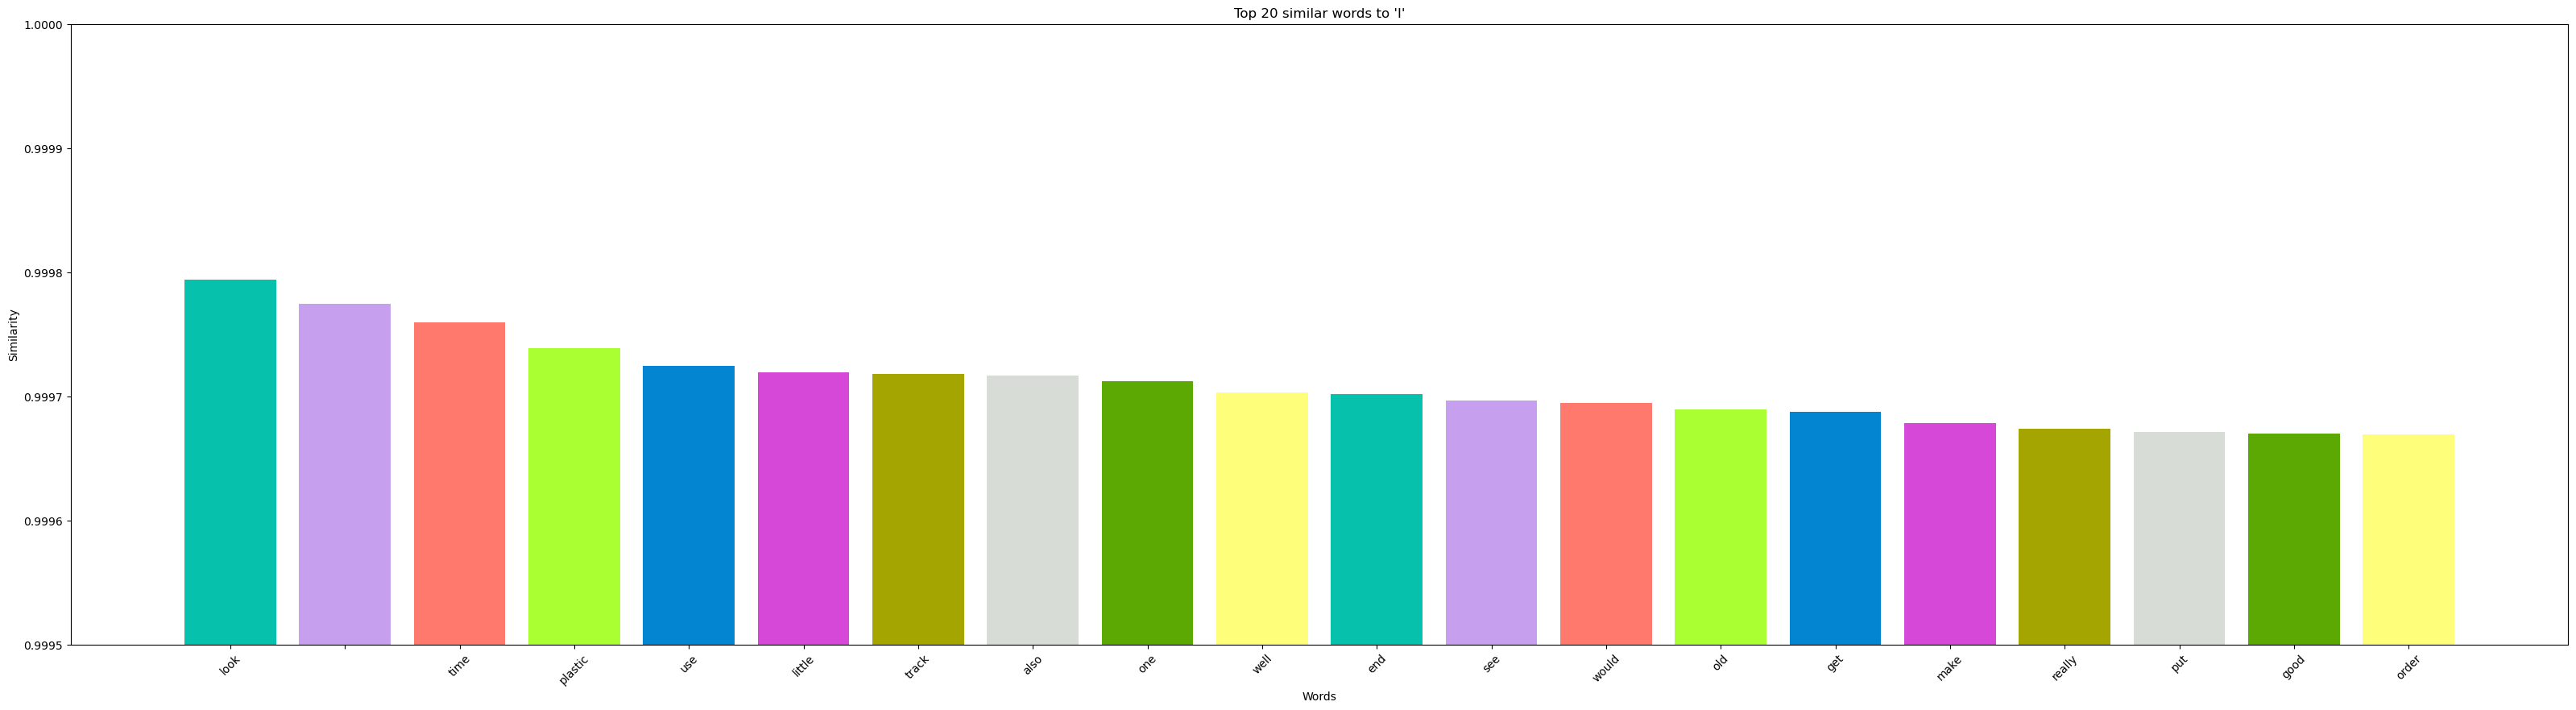

<Figure size 640x480 with 0 Axes>

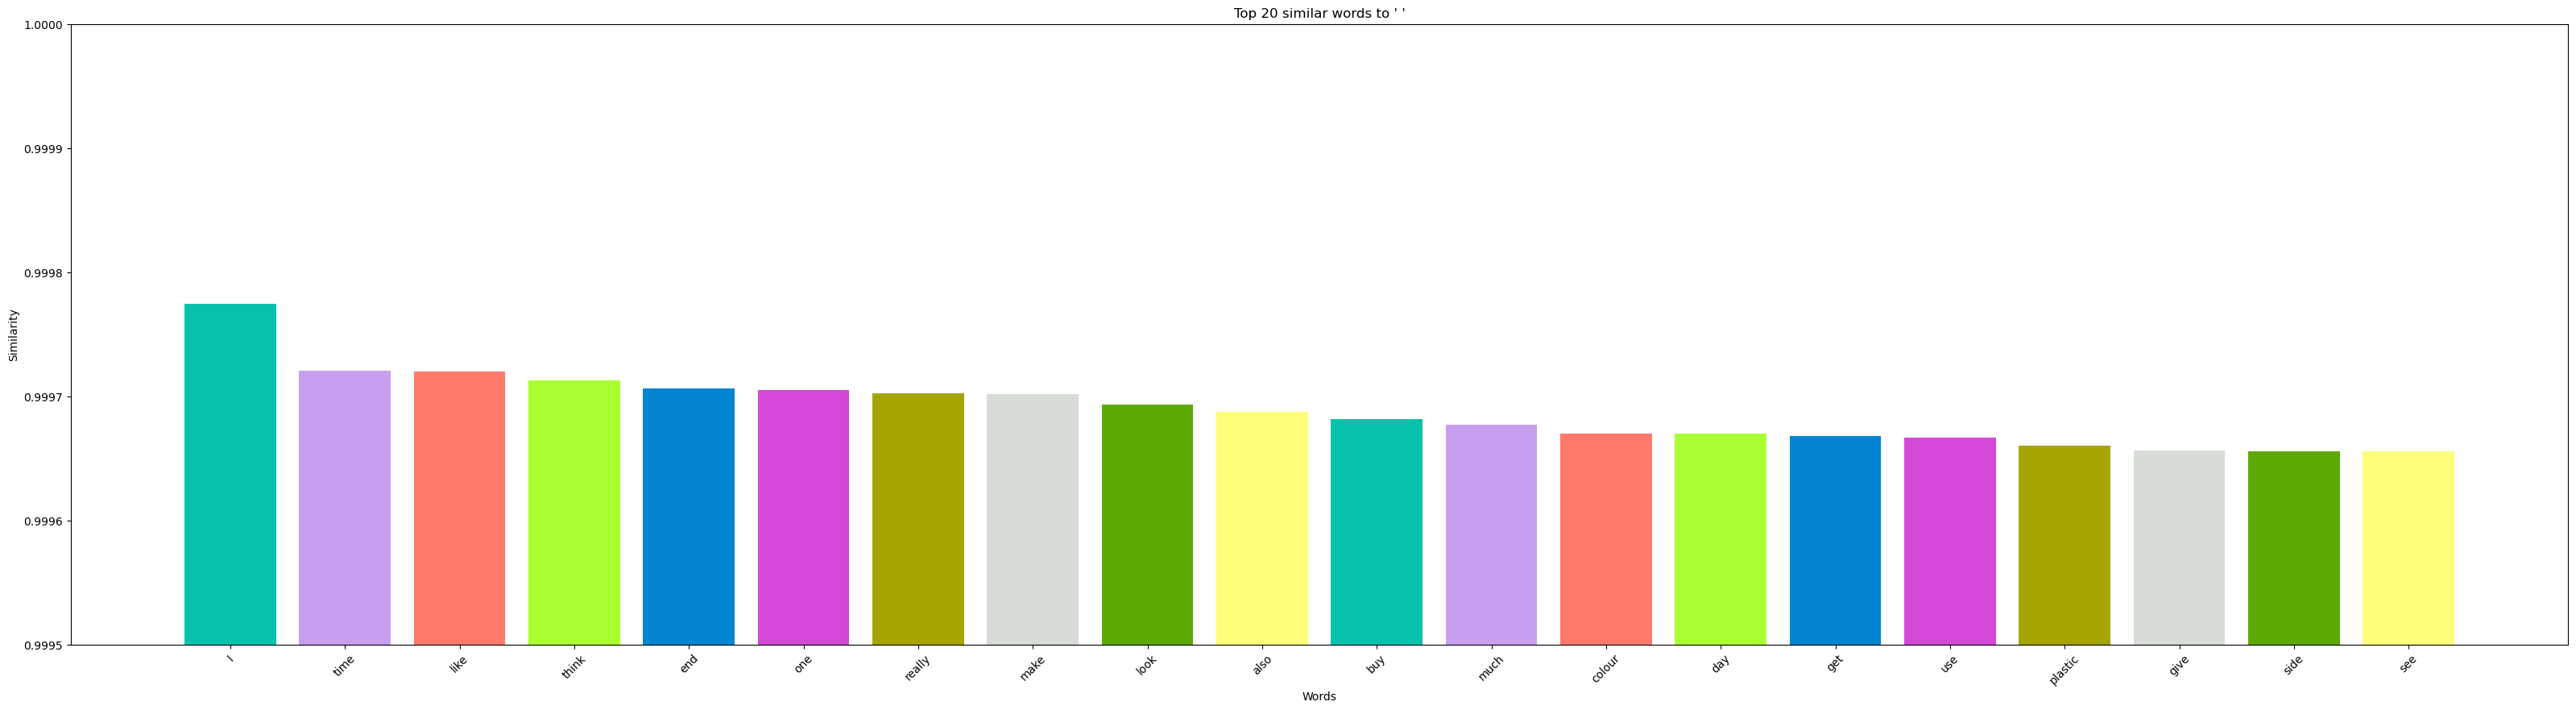

<Figure size 640x480 with 0 Axes>

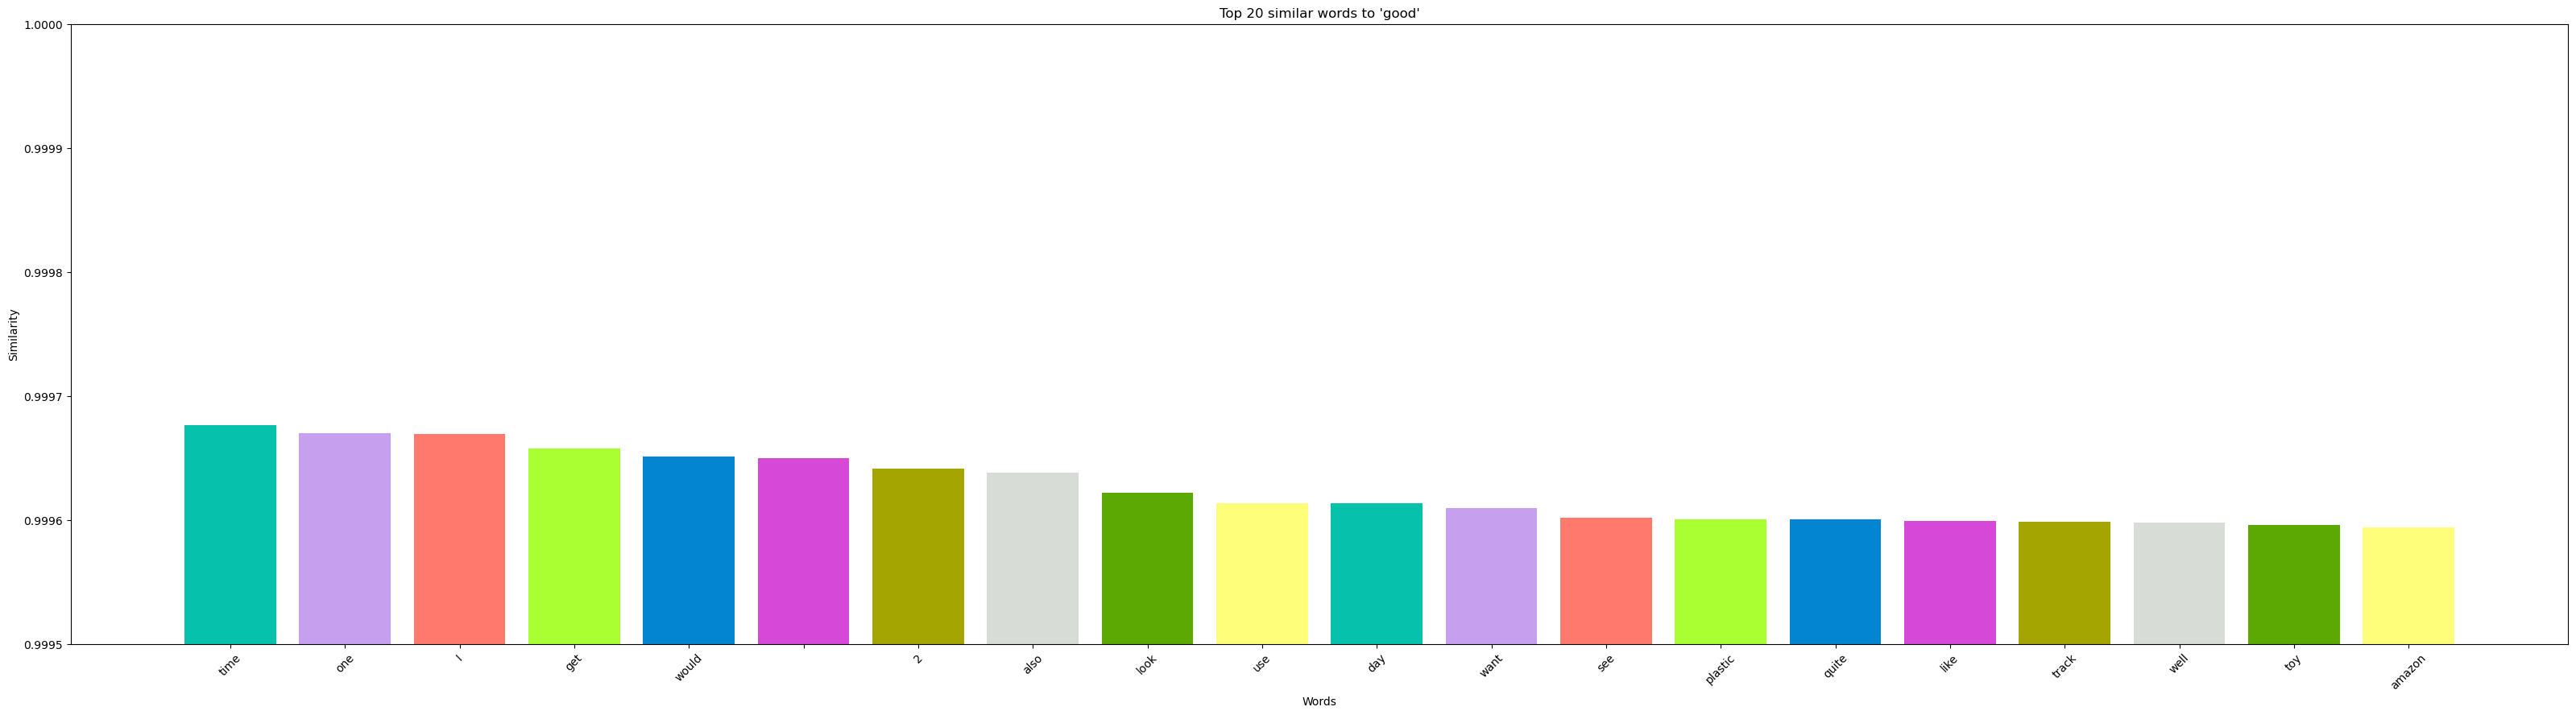

<Figure size 640x480 with 0 Axes>

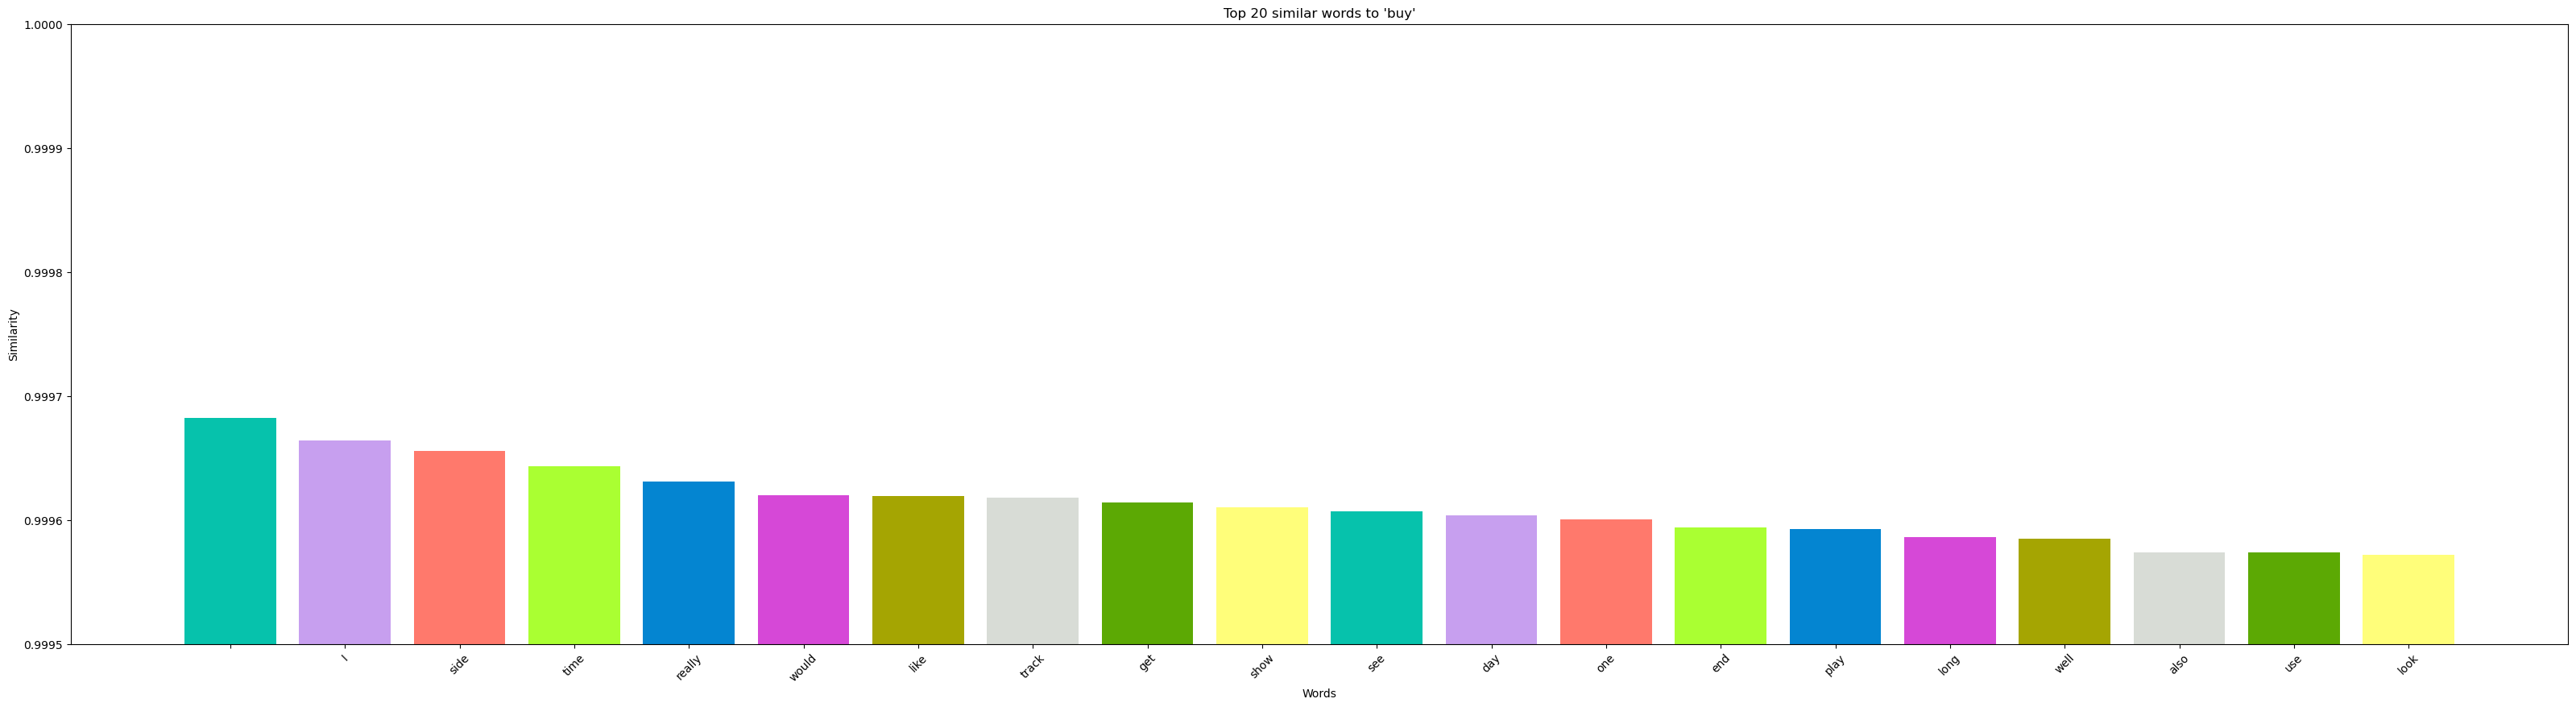

<Figure size 640x480 with 0 Axes>

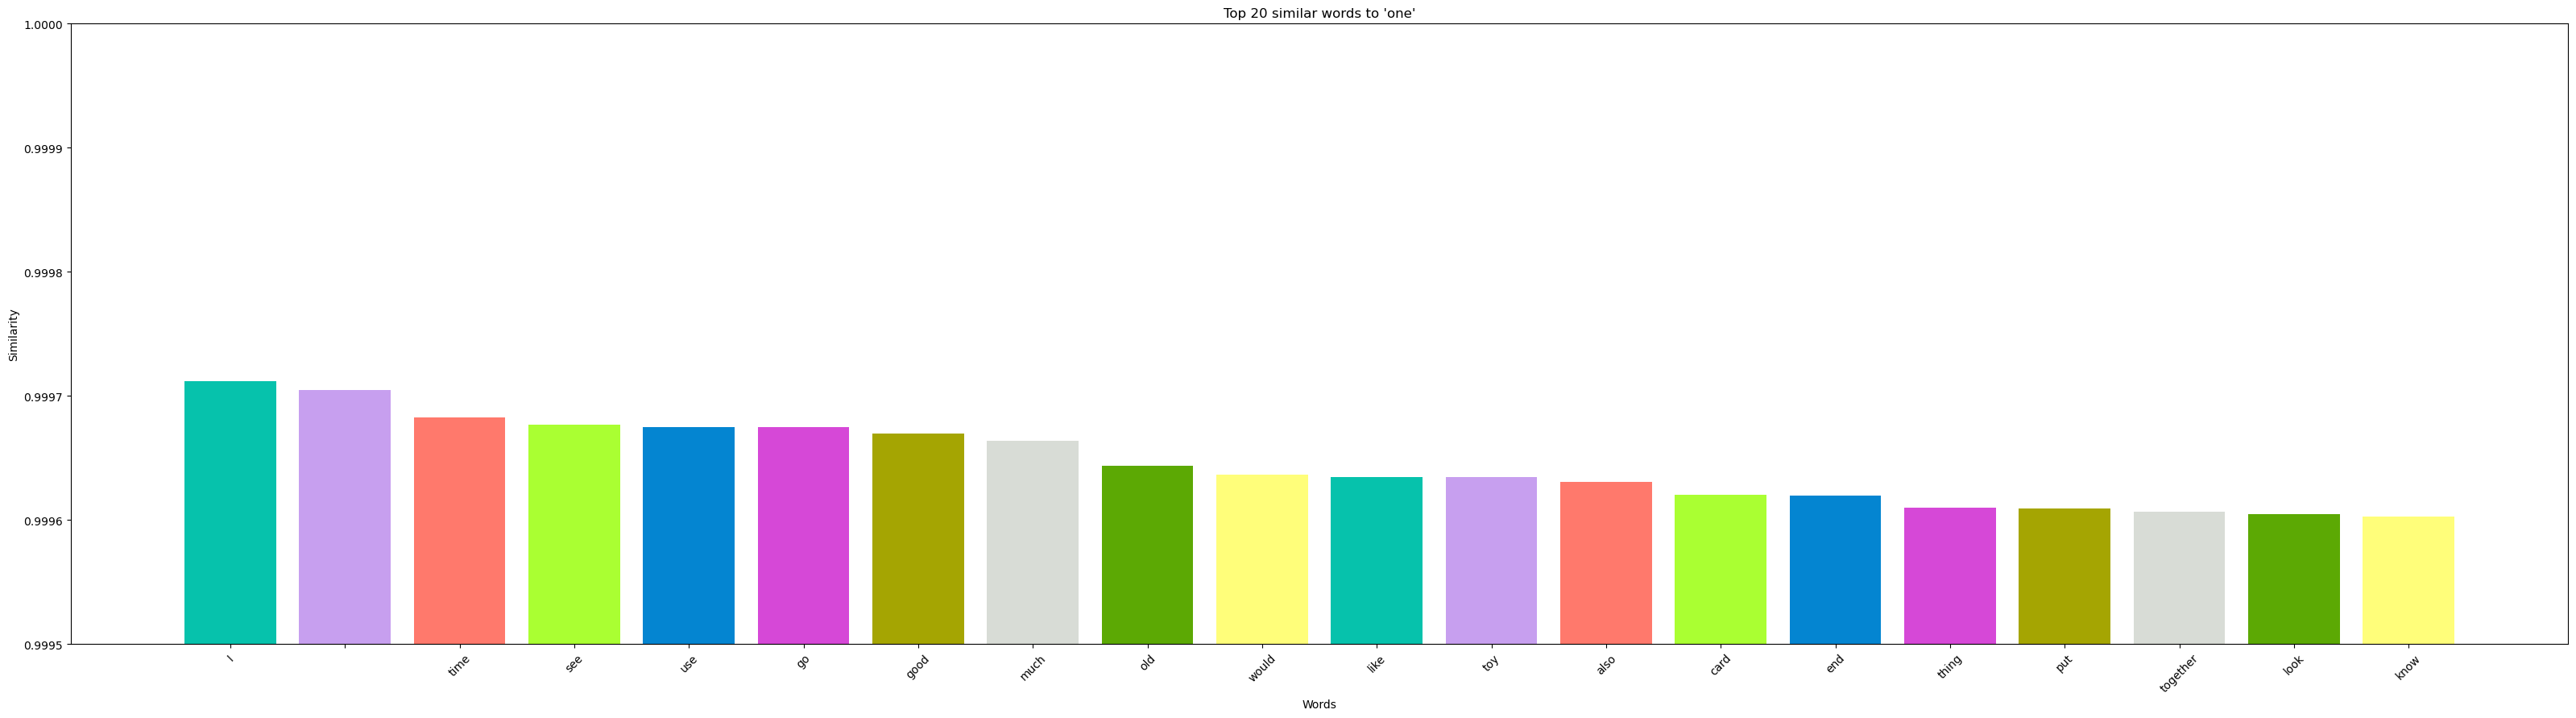

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt


def drawGraph(bargraph_data, word):
    plt.figure(figsize=(40,10))
    xtick = [item[0] for item in bargraph_data]
    ytick = [item[1] for item in bargraph_data]

    plt.title(f"Top 20 similar words to '{word}'")
    plt.xlabel("Words")
    plt.ylabel("Similarity")
    plt.ylim(0.9995, 1.0)

    mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a' ]
    plt.bar(xtick, ytick, color=mycolors)
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.figure()



for word in top_5_words:
    bargraph_data = w2v_model.wv.most_similar(positive=[word], topn=20)
    drawGraph(bargraph_data, word)

##8. t-SNE

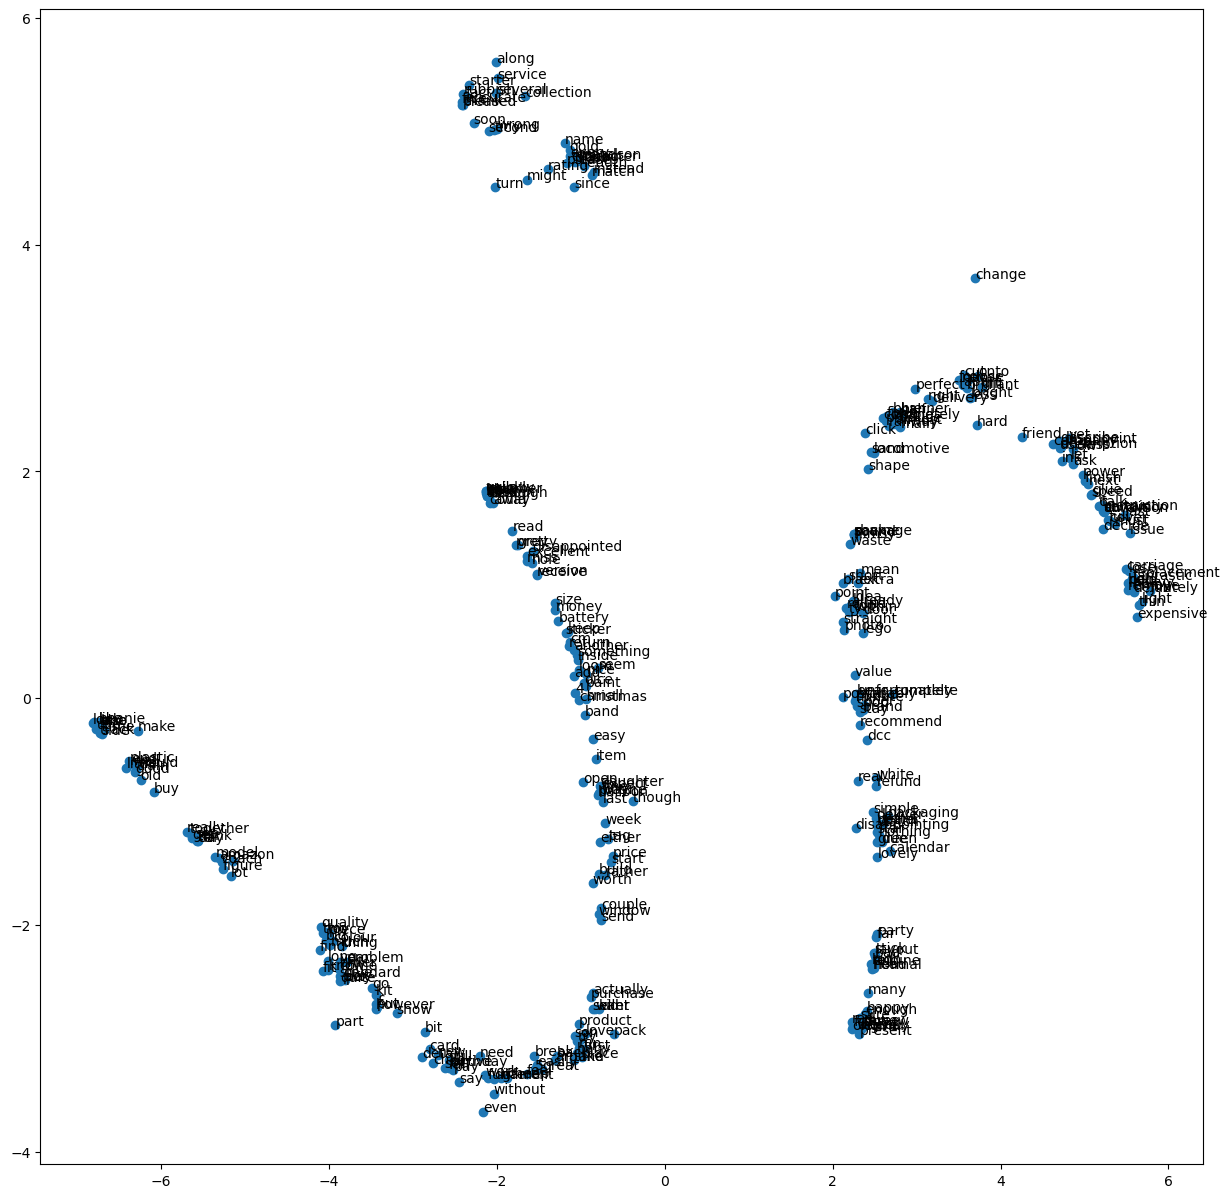

In [31]:
from sklearn.manifold import TSNE

word_vectors = w2v_model.wv
vocabs = word_vectors.index_to_key
word_vectors_list = np.array([word_vectors[v] for v in vocabs])

TSNE_model = TSNE(perplexity=5, max_iter=250)
transformed = TSNE_model.fit_transform(word_vectors_list)

xs = transformed[:, 0]
ys = transformed[:, 1]

plt.figure(figsize=(15,15))
plt.scatter(xs, ys)
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))

In [32]:
# Try modifying the index to display different word vectors from the corresponding vocabulary (word)
print(word_vectors[4])
print(vocabs[4])

[-0.3367804   0.14094624  0.06760551  0.19248517  0.17779785 -0.42196098
  0.22590287  0.514481   -0.29403505 -0.05146476 -0.03858028 -0.32068056
 -0.22630614  0.06281056  0.0238423  -0.33074844  0.04416612 -0.46125966
 -0.15552565 -0.6912089   0.14557667  0.16411039  0.12618303 -0.13031542
 -0.00656145 -0.05306042 -0.24403816 -0.344464   -0.51091766 -0.18679006
  0.21884766  0.25381163  0.17675176 -0.01795654 -0.16478695  0.711537
  0.05489135 -0.31670362 -0.24355298 -0.8282253   0.32340878 -0.55940723
 -0.3425109   0.03745075  0.38252157  0.02103567 -0.1956669  -0.19990928
  0.14410841  0.05514477  0.40901402 -0.06717255  0.1527431   0.08657593
 -0.12022492  0.17766637  0.19747025  0.09521017 -0.67252403  0.17428245
  0.04641949 -0.07919407  0.21682338 -0.61349857 -0.48031875  0.05987732
  0.38247848  0.41910988 -0.5628462   0.54472685 -0.3077991   0.00161349
  0.0678633  -0.03835694  0.41803268  0.17749743  0.0560237  -0.074856
 -0.53886884  0.3296088  -0.1361611   0.08798005 -0.394

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

def encode_review_with_dict(review, word_to_rating):
    encoded = [word_to_rating.get(word, word_to_rating['<OOV>']) for word in review]
    return np.bincount(encoded, minlength=6)[1:]  # index 0 is unused

# Build feature matrix
X_train1 = np.array([encode_review_with_dict(r, max_dict) for r in train_df_lemma['review']])
y_train1 = train_df_lemma['rating'].astype(int).values

X_test1 = np.array([encode_review_with_dict(r, max_dict) for r in test_df_lemma['review']])
y_test1 = test_df_lemma['rating'].astype(int).values

# Train and evaluate
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

print("Integer Encoding + Logit:")
print(classification_report(y_test1, y_pred1, zero_division=0))

Integer Encoding + Logit:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.25      0.80      0.38         5
           4       0.67      0.40      0.50         5
           5       1.00      0.80      0.89         5

    accuracy                           0.40        25
   macro avg       0.38      0.40      0.35        25
weighted avg       0.38      0.40      0.35        25



In [34]:
def average_embedding(review, model):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Build feature matrix
X_train2 = np.array([average_embedding(r, w2v_model) for r in train_df_lemma['review']])
y_train2 = train_df_lemma['rating'].astype(int).values

X_test2 = np.array([average_embedding(r, w2v_model) for r in test_df_lemma['review']])
y_test2 = test_df_lemma['rating'].astype(int).values

# Train and evaluate
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)

print("Word2Vec + Logit:")
print(classification_report(y_test2, y_pred2, zero_division=0))

Word2Vec + Logit:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.27      0.60      0.38         5
           4       0.00      0.00      0.00         5
           5       0.17      0.40      0.24         5

    accuracy                           0.20        25
   macro avg       0.09      0.20      0.12        25
weighted avg       0.09      0.20      0.12        25



Version 1: Word-to-Index Encoding
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.25      0.80      0.38         5
           4       0.67      0.40      0.50         5
           5       1.00      0.80      0.89         5

    accuracy                           0.40        25
   macro avg       0.38      0.40      0.35        25
weighted avg       0.38      0.40      0.35        25



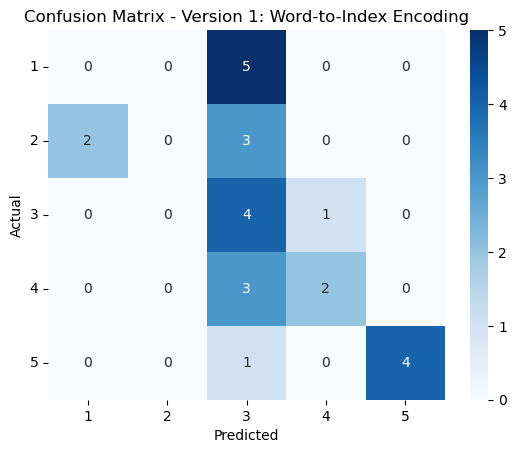

Version 2: Word2Vec Embedding
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.27      0.60      0.38         5
           4       0.00      0.00      0.00         5
           5       0.17      0.40      0.24         5

    accuracy                           0.20        25
   macro avg       0.09      0.20      0.12        25
weighted avg       0.09      0.20      0.12        25



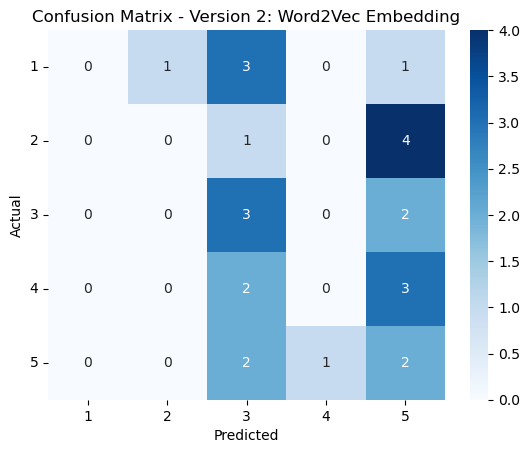

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, title):
    print(title)
    print(classification_report(y_true, y_pred, zero_division=0))
    sns.heatmap(confusion_matrix(y_true, y_pred, labels=[1,2,3,4,5]),
                annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.yticks(rotation=0)
    plt.show()

evaluate_model(y_test1, y_pred1, "Version 1: Word-to-Index Encoding")
evaluate_model(y_test2, y_pred2, "Version 2: Word2Vec Embedding")